In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Описание проектной задачи

Необходимо научиться по результатам опроса, который авиакомпания проводит после полёта, предсказывать удовлетворённость пассажиров услугами авиакомпании и совершённым перелётом.

После перелёта пассажир заполнял анкету, которая состоит из различных вопросов про условия на борту самолёта и качество предоставленных услуг. Последний вопрос в анкете был сформулирован таким образом: оцените свою удовлетворённость совершённым перелётом.

Задача состоит в том, чтобы на основе того, как пассажир отвечал на остальные вопросы анкеты, предсказать, остался он удовлетворён полётом или нет. Данная задача является классической задачей бинарной классификации, и решить её предлагается с помощью модели логистической регрессии.

Всего в данных представлены результаты **129 880** опросов.

In [3]:
# загрузка данных
data = pd.read_csv('data.csv')
data.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,25,18.0,False
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,1,1,6.0,False
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,5,0,0.0,True
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,2,11,9.0,False
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,0,0.0,True
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,1,3,4,4,4,1,0,0.0,False
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,2,3,3,4,3,2,9,23.0,False
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,5,4,4,4,0.0,True
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,3,1,1,2,1,4,2,0,0.0,False
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,3,2,2,3,4,4,2,0,0.0,False


### Факторы:
* **Gender** — пол пассажира (бинарный: **Female** — женский, **Male** — мужской).
* **Customer Type** — тип пассажира (категориальный: **Loyal customer** — лояльный, **disloyal Customer** — не лояльный).
* **Age** — возраст пассажира (численный).
* **Type of Travel** — цель поездки (бинарный: **Personal Travel** — личная поездка, **Business Travel** — рабочая поездка).
* **Class** — класс полёта (категориальный: **Business** — бизнес-класс, **Eco** — эконом, **Eco Plus** — эконом-плюс).
* **Flight distance** — длина перелёта (численный).
* **Inflight wifi service** — удовлетворённость сетью Wi-Fi на борту самолёта (численный: **1–5** или **0**, если не оценивался).
* **Departure/Arrival time convenient** — удовлетворённость временем вылета/прилёта (численный: **1–5** или **0**, если не оценивался).
* **Ease of Online booking** — удовлетворённость удобством онлайн-бронирования билетов (численный: **1–5** или **0**, если не оценивался).
* **Gate location** — удовлетворённость расположением выходов на посадку (численный: **1–5** или **0**, если не оценивался).
* **Food and drink** — удовлетворённость питанием на борту (численный: **1–5** или **0**, если не оценивался).
* **Online boarding** — удовлетворённость удобством онлайн-регистрации на рейс (численный: **1–5** или **0**, если не оценивался).
* **Seat comfort** — удовлетворённость удобством мест в самолёте (численный: **1–5** или **0**, если не оценивался).
* **Inflight entertainment** — удовлетворённость уровнем развлечений на борту самолёта (численный: **1–5** или **0**, если не оценивался).
* **On-board service** — удовлетворённость уровнем обслуживания на борту самолёта (численный: **1–5** или **0**, если не оценивался).
* **Leg room service** — удовлетворённость местом для ног перед сиденьем (численный: **1–5** или **0**, если не оценивался).
* **Baggage handling** — удовлетворённость обращением с багажом (численный: **1–5** или **0**, если не оценивался).
* **Checkin service** — удовлетворённость обслуживанием на стойке регистрации (численный: **1–5** или **0**, если не оценивался).
* **Cleanliness** — удовлетворённость чистотой в самолёте (численный: **1–5** или **0**, если не оценивался).
* **Departure Delay in Minutes** — задержка отправления самолёта в минутах (численный: **1–5** или **0**, если не оценивался).
* **Arrival Delay in Minutes** — задержка прибытия самолёта в минутах (численный: **1–5** или **0**, если не оценивался).

### Предсказываемая характеристика:
* **satisfaction** — удовлетворённость полётом (бинарный: **False** — пассажир остался не удовлетворён полётом, **True** — пассажир остался удовлетворён полётом).

# Разделение на тестовую и обучающие выборки

Перед началом решения задачи необходимо разделить имеющиеся данные на обучающую и тестовую выборки, но перед этим желательно проверить данные на выбросы и удалить их. Тестовую выборку нужно отложить до момента итоговой оценки качества полученной модели. А для дальнейших исследований и непосредственно обучения модели — использовать обучающую выборку.

<Axes: xlabel='Age', ylabel='Count'>

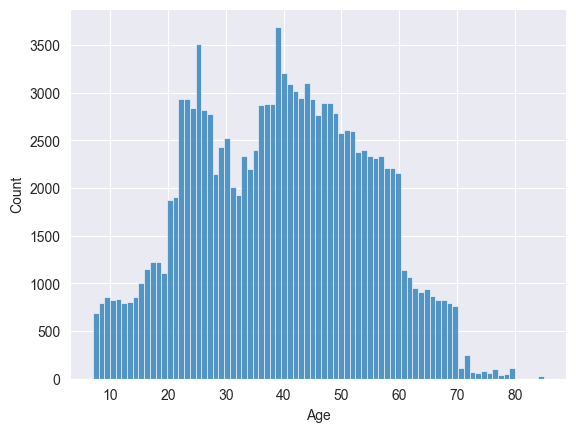

In [4]:
# распределение возраста пассажиров
sns.histplot(data['Age'], bins=79)

Возраст имеет нормально распределение, где среднее значение находится в районе 40 лет

<Axes: xlabel='Flight Distance', ylabel='Count'>

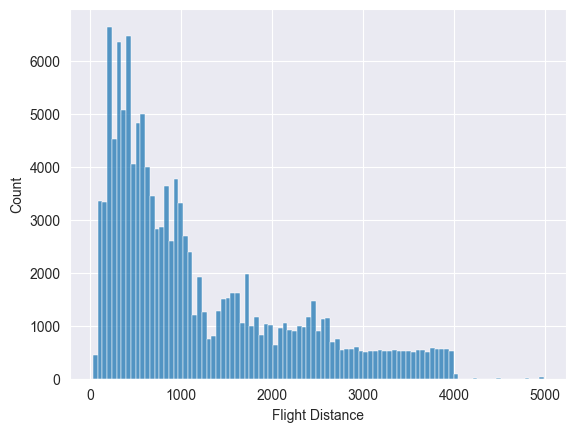

In [5]:
# распределение длины палёта
sns.histplot(data['Flight Distance'])

Есть небольшое количество полётов с длиной более 4000, что не является выбросами, так как такие большие перелёты возможны. Большая часть полётов имеет длину в районе 500, что является нормальным распределением.

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

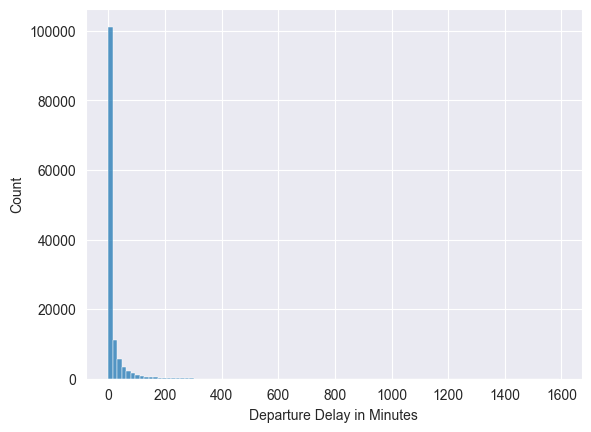

In [22]:
# распределение задержки отправления самолёта
sns.histplot(data['Departure Delay in Minutes'], bins=100)

Большая часть полётов не имеет задержки отправления, что является нормальным распределением. Некоторые из них имеют огромные значения (более 1000), что тоже нормально, так как иногда рейсы переносятся на сутки или больше)

,satisfaction,Gender
0,False,73452
1,True,56428


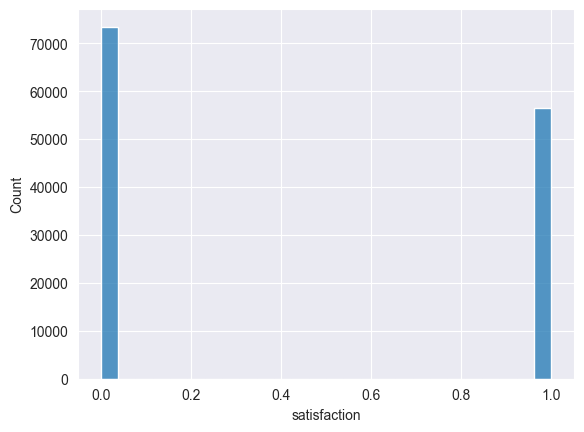

In [26]:
# распределение предсказываемого признака (удовлетворённость полётом)
data.groupby('satisfaction', as_index=False)['Gender'].count()

Признак распределён равномерно, поэтому модель будет обучена хорошо для обоих случаев.

In [27]:
X = data.drop(columns='satisfaction')
y = data['satisfaction']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)